product Description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 



Dataset Link-  
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv


In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC


In [160]:
df=pd.read_csv('/users/rekhagrg/downloads/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [161]:
print(df.head())

   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...      

In [162]:
print(df.info
     )

<bound method DataFrame.info of      months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_a

In [163]:
print(df.describe
     
     
     )

<bound method NDFrame.describe of      months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy

In [164]:
#check for missing value 
print(df.isnull().sum())

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [165]:
# # Handle missing values in '_c39'
# df['_c39'].fillna(value=0, inplace=True)


In [166]:
#drop the _c39 column
df.drop('_c39',axis=1,inplace=True)



In [167]:
print(df.columns)

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')


In [168]:
print(df.isnull().sum())

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

# Visualisation 

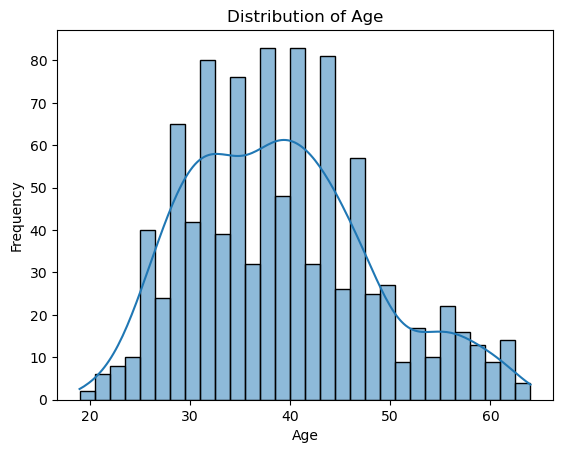

In [169]:
#visualisation the distribution of age
sns.histplot(df['age'],bins
             =30,kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

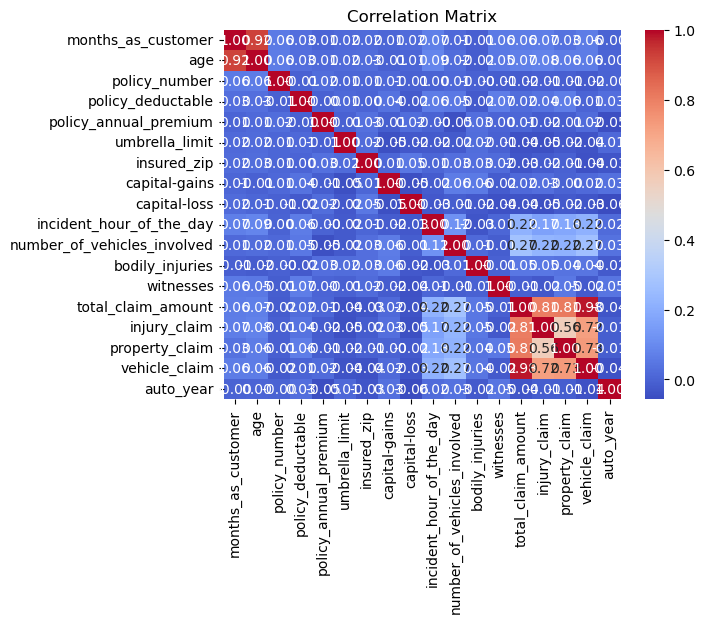

In [170]:
#visualie the correlation matrix
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

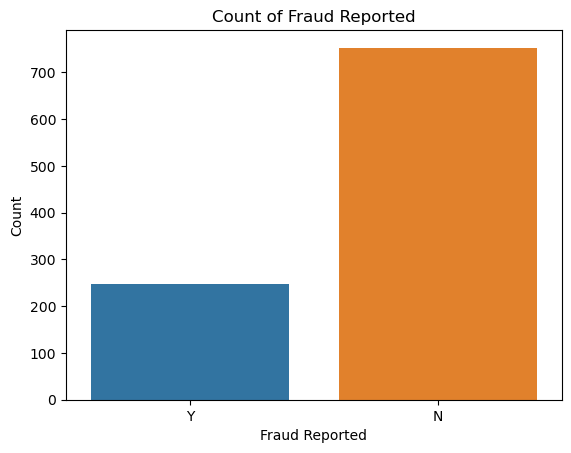

In [171]:
#visualize the count of fraud reported
sns.countplot(x='fraud_reported',data=df)
plt.title('Count of Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.show()

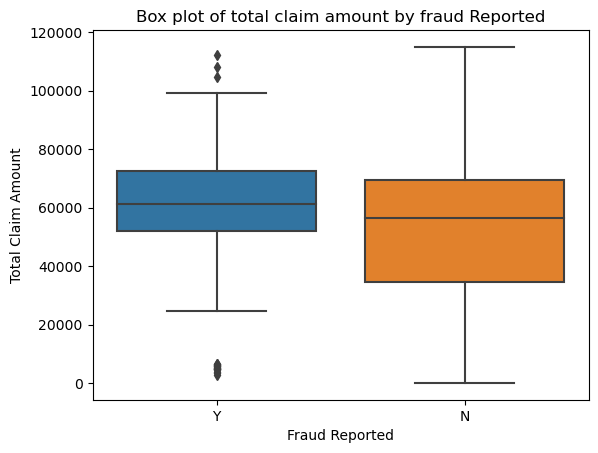

In [172]:
#box plot for totol claim amount by fraud reported 
sns.boxplot(x='fraud_reported',y='total_claim_amount',data=df)
plt.title('Box plot of total claim amount by fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Total Claim Amount')
plt.show()

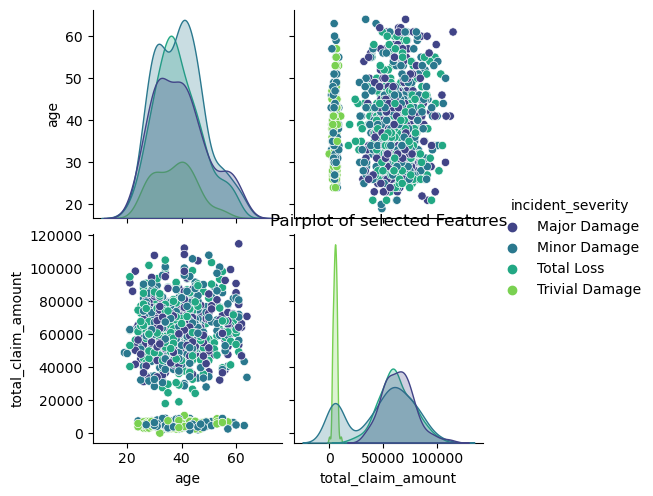

In [173]:

#pairplot for selected features
selected_features=['age','total_claim_amount','incident_severity']
sns.pairplot(df[selected_features],hue='incident_severity',palette='viridis')
plt.title('Pairplot of selected Features')
plt.show()


# Build and Test Multiple Models

In [202]:
# Identify categorical columns with string values
categorical_cols = df.select_dtypes(include=['object']).columns

In [204]:
categorical_cols

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')

In [205]:
final_category=categorical_cols.drop('fraud_reported')

In [206]:
# One-hot encode all categorical variables
df_encoded = pd.get_dummies(df, columns=final_category, drop_first=True)


In [207]:
# Separate numerical columns
numerical_cols = [col for col in df.columns if col not in categorical_cols]


In [208]:
# Create a DataFrame with only numerical columns
df_numerical = df[numerical_cols]

In [209]:
# Concatenate the one-hot encoded DataFrame with the numerical DataFrame
df_final = pd.concat([df_numerical, df_encoded], axis=1)

In [210]:
#split the data into training and testing sets
X=df_final.drop('fraud_reported',axis=1)
y=df_final['fraud_reported']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [214]:
#Build and test multiple models
model_rf=RandomForestClassifier(random_state=42)
model_rf.fit(X_train,y_train)
y_pred=model_rf.predict(X_test)

In [215]:
accuracy_rf=accuracy_score(y_pred, y_test)
accuracy_rf

0.7333333333333333

In [217]:
# Logistic Regression
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

/Users/rekhagrg/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [218]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_lr

0.7266666666666667

In [221]:
# Support Vector Classifier (SVC)
model_svc = SVC(random_state=42)
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)

In [222]:
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_svc

0.73

In [223]:
print("Random Forest Accuracy:",accuracy_rf)
print("Logistic Regression Accuracy:",accuracy_lr)
print("SVC Accuracy:",accuracy_svc)

Random Forest Accuracy: 0.7333333333333333
Logistic Regression Accuracy: 0.7266666666666667
SVC Accuracy: 0.73


f1_score

In [230]:
from sklearn.metrics import f1_score

#Random forest
f1_rf=f1_score(y_test,y_pred,pos_label='Y')
print("F1 Score (Random Forest):",f1_rf)
#Logistic Regression
f1_lr=f1_score(y_test,y_pred_lr,pos_label='Y')
print("F1 Score(Logistic Regression):",f1_lr)
#SVC
f1_svc=f1_score(y_test,y_pred_svc,pos_label='Y')
print("F1 score(SVC):",f1_svc)

F1 Score (Random Forest): 0.0
F1 Score(Logistic Regression): 0.0
F1 score(SVC): 0.0


We can see f1 score for all model above  is 0 so lets try another model

In [233]:
# Print confusion matrix and classification report
conf_matrix_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Random Forest):\n", conf_matrix_rf)

class_report_rf = classification_report(y_test, y_pred)
print("Classification Report (Random Forest):\n", class_report_rf)

Confusion Matrix (Random Forest):
 [[220   0]
 [ 80   0]]
Classification Report (Random Forest):
               precision    recall  f1-score   support

           N       0.73      1.00      0.85       220
           Y       0.00      0.00      0.00        80

    accuracy                           0.73       300
   macro avg       0.37      0.50      0.42       300
weighted avg       0.54      0.73      0.62       300



/Users/rekhagrg/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rekhagrg/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rekhagrg/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [236]:
# Create GradientBoostingClassifier
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

In [239]:
# Print confusion matrix and classification report for Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix (Gradient Boosting):\n", conf_matrix_gb)
class_report_gb = classification_report(y_test, y_pred_gb)
print("Classification Report (Gradient Boosting):\n", class_report_gb)

Confusion Matrix (Gradient Boosting):
 [[197  23]
 [ 44  36]]
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           N       0.82      0.90      0.85       220
           Y       0.61      0.45      0.52        80

    accuracy                           0.78       300
   macro avg       0.71      0.67      0.69       300
weighted avg       0.76      0.78      0.76       300



In [241]:
cv_scores=cross_val_score(model_rf,X,y,cv=5,scoring='accuracy')
mean_cv_score=np.mean(cv_scores)
print('cross-validation Scores:',cv_scores)
print('Mean Cross-Validation score:',mean_cv_score)

cross-validation Scores: [0.75  0.75  0.76  0.755 0.755]
Mean Cross-Validation score: 0.7539999999999999


In [244]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [245]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [246]:
# Print the results
print("Best Hyperparameters:", best_params)
print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Model Accuracy: 0.95
Confusion Matrix:
 [[220   0]
 [ 15  65]]
Classification Report:
               precision    recall  f1-score   support

           N       0.94      1.00      0.97       220
           Y       1.00      0.81      0.90        80

    accuracy                           0.95       300
   macro avg       0.97      0.91      0.93       300
weighted avg       0.95      0.95      0.95       300



From above result we can summarize the Model Accuracy:95%


-True Positive (TP): 65
-True Negative (TN): 220
-False Positive (FP): 0
-False Negative (FN): 15

Precision(Y):1
Recall(Y):81%
F1 Score(Y):0.90     